In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 
rcParams['figure.figsize'] = 10, 5

             rates
week              
2004-01-04  152.13
2004-01-11  145.60
2004-01-18  111.26
2004-01-25  119.86
2004-02-01  113.44


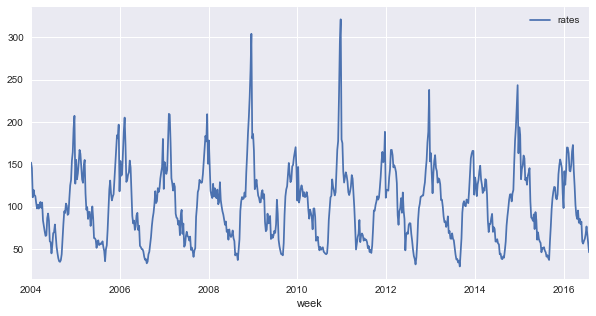

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('real_rates.csv',parse_dates=['week'],index_col=0,date_parser=dateparse)
print(data.head())
data.plot()
pyplot.show()

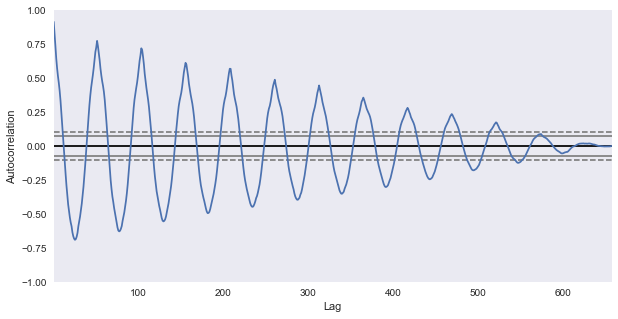

In [3]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data)
pyplot.show()

In [4]:
from pandas import datetime
from pandas import DataFrame
import statsmodels.api as sm

# fit model
model = sm.tsa.statespace.SARIMAX(data, order=(5,1,2))
results = model.fit()
print(results.summary().tables[1])

/Users/tutuanna/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5721      0.534      1.072      0.284      -0.474       1.618
ar.L2         -0.2932      0.288     -1.016      0.309      -0.859       0.272
ar.L3         -0.0383      0.062     -0.617      0.537      -0.160       0.083
ar.L4         -0.1092      0.057     -1.920      0.055      -0.221       0.002
ar.L5         -0.0339      0.114     -0.298      0.766      -0.257       0.189
ma.L1         -0.6039      0.538     -1.123      0.262      -1.658       0.450
ma.L2          0.3890      0.301      1.294      0.196      -0.200       0.978
sigma2       323.0365     12.207     26.464      0.000     299.112     346.961


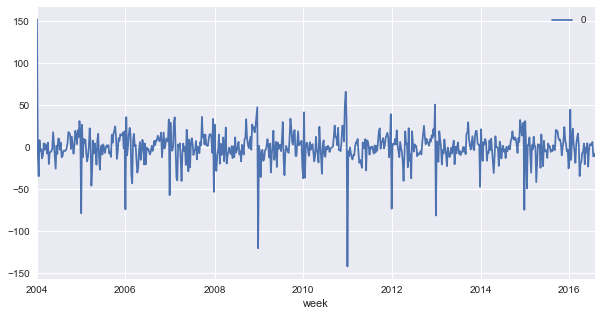

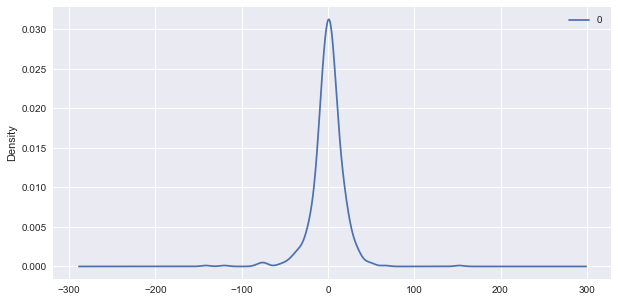

                0
count  657.000000
mean     0.049841
std     18.890828
min   -141.692692
25%     -7.056676
50%      1.071447
75%      8.829635
max    152.130000


In [5]:
# plot residual errors
residuals = DataFrame(results.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [6]:
x=data.values
x[0:12]
L=data.index[314:366]
L

DatetimeIndex(['2010-01-10', '2010-01-17', '2010-01-24', '2010-01-31',
               '2010-02-07', '2010-02-14', '2010-02-21', '2010-02-28',
               '2010-03-07', '2010-03-14', '2010-03-21', '2010-03-28',
               '2010-04-04', '2010-04-11', '2010-04-18', '2010-04-25',
               '2010-05-02', '2010-05-09', '2010-05-16', '2010-05-23',
               '2010-05-30', '2010-06-06', '2010-06-13', '2010-06-20',
               '2010-06-27', '2010-07-04', '2010-07-11', '2010-07-18',
               '2010-07-25', '2010-08-01', '2010-08-08', '2010-08-15',
               '2010-08-22', '2010-08-29', '2010-09-05', '2010-09-12',
               '2010-09-19', '2010-09-26', '2010-10-03', '2010-10-10',
               '2010-10-17', '2010-10-24', '2010-10-31', '2010-11-07',
               '2010-11-14', '2010-11-21', '2010-11-28', '2010-12-05',
               '2010-12-12', '2010-12-19', '2010-12-26', '2011-01-02'],
              dtype='datetime64[ns]', name='week', freq=None)

In [7]:
data.values[0:12]

array([[ 152.13],
       [ 145.6 ],
       [ 111.26],
       [ 119.86],
       [ 113.44],
       [ 112.77],
       [ 104.46],
       [  98.01],
       [ 102.49],
       [  97.86],
       [ 102.59],
       [ 105.66]])

### 2011

In [8]:
from sklearn.metrics import mean_squared_error
test_2011 = x[366:418]
model = sm.tsa.statespace.SARIMAX(test_2011, order=(9,1,3))

results_2011=model.fit()
predictions_2011=results_2011.predict()
test_2011=np.concatenate(test_2011, axis=0 )

/Users/tutuanna/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
predictions_2011[0]=130.9876
p_2011=predictions_2011[:]
t_2011=test_2011[:]
from sklearn.metrics import mean_squared_error
error=mean_squared_error(t_2011, p_2011)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:16.2776


In [10]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(t_2011, p_2011)
print ('MAE:%.4f'% MAE)

MAE:12.2105


In [11]:
def mean_absolute_percentage_error(t_2011, p_2011): 
    t_2011, p_2011 = np.array(t_2011), np.array(p_2011)
    return np.mean(np.abs((t_2011 - p_2011) / t_2011)) * 100
MAPE=mean_absolute_percentage_error(t_2011, p_2011)
print ('MAPE:%.4f'% MAPE)

MAPE:12.3399


In [12]:
np.corrcoef(t_2011, p_2011)

array([[ 1.        ,  0.91111292],
       [ 0.91111292,  1.        ]])

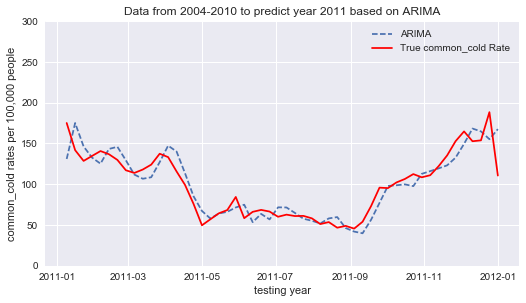

In [17]:
L=data.index[366:418] 


y2011 = pd.DataFrame(data=p_2011, index=L,columns=["predicted rate"])
y2011_1 = pd.DataFrame(data=t_2011, index=L,columns=["rates"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(y2011, label='ARIMA',ls='dashed')
line_down, = plt.plot(y2011_1, label='True common_cold Rate',color='red')

plt.legend(handles=[line_up, line_down])

plt.title('Data from 2004-2010 to predict year 2011 based on ARIMA' )
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()

### 2012

In [18]:
from sklearn.metrics import mean_squared_error
test_2012 = x[418:470]
model = sm.tsa.statespace.SARIMAX(test_2012, order=(2,1,0))

results_2012=model.fit()
predictions_2012=results_2012.predict()
test_2012=np.concatenate(test_2012, axis=0 )

In [20]:
predictions_2012[0]=102.90
p_2012=predictions_2012[:]
t_2012=test_2012[:]
from sklearn.metrics import mean_squared_error
error=mean_squared_error(t_2012, p_2012)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:19.0732


In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2012, p_2012)
MAE=mean_absolute_error(t_2012, p_2012)
print ('MAE:%.4f'% MAE)

MAE:13.7469


In [22]:
MAPE=mean_absolute_percentage_error( t_2012,  p_2012)
print ('MAPE:%.4f'% MAPE)

MAPE:14.4171


In [23]:
np.corrcoef(t_2012, p_2012)

array([[ 1.        ,  0.90150633],
       [ 0.90150633,  1.        ]])

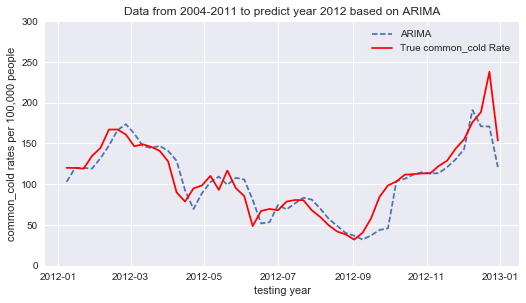

In [25]:
L1=data.index[418:470]


y2012 = pd.DataFrame(data=p_2012, index=L1,columns=["predicted rate"])
y2012_1 = pd.DataFrame(data=t_2012, index=L1,columns=["rates"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(y2012, label='ARIMA', ls='dashed')
line_down, = plt.plot(y2012_1, label='True common_cold Rate',color='red')

plt.legend(handles=[line_up,line_down])

plt.title('Data from 2004-2011 to predict year 2012 based on ARIMA')
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()
 

### 2013

In [27]:
from sklearn.metrics import mean_squared_error
test_2013 = x[470:522]
model = sm.tsa.statespace.SARIMAX(test_2013, order=(3,2,1))

results_2013=model.fit()
predictions_2013=results_2013.predict()
test_2013=np.concatenate(test_2013, axis=0 )

In [29]:
predictions_2013[0]=145.8796
p_2013=predictions_2013[:]
t_2013=test_2013[:]
from sklearn.metrics import mean_squared_error
error=mean_squared_error(t_2013, p_2013)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:23.6671


In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2013, p_2013)
MAE=mean_absolute_error(t_2013, p_2013)
print ('MAE:%.4f'% MAE)

MAE:14.3679


In [31]:
MAPE=mean_absolute_percentage_error( t_2013,  p_2013)
print ('MAPE:%.4f'% MAPE)

MAPE:14.4550


In [32]:
np.corrcoef(t_2013, p_2013)

array([[ 1.        ,  0.85173679],
       [ 0.85173679,  1.        ]])

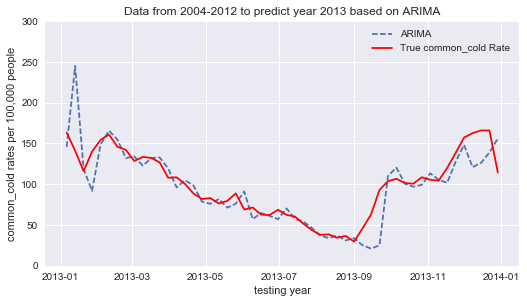

In [33]:
L=data.index[470:522]    
y2013 = pd.DataFrame(data=p_2013, index=L,columns=["predicted rate"])
y2013_1 = pd.DataFrame(data=t_2013, index=L,columns=["rates"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(y2013, label='ARIMA',ls='dashed')
line_down, = plt.plot(y2013_1, label='True common_cold Rate',color='red')
plt.legend(handles=[line_up, line_down])

plt.title('Data from 2004-2012 to predict year 2013 based on ARIMA' )
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()
 

### 2014

In [34]:
from sklearn.metrics import mean_squared_error
test_2014 = x[522:574]
model = sm.tsa.statespace.SARIMAX(test_2014, order=(1,1,1))

results_2014=model.fit()
predictions_2014=results_2014.predict()
test_2014=np.concatenate(test_2014, axis=0 )

In [36]:
predictions_2014[0]=157.3546
p_2014=predictions_2014[:]
t_2014=test_2014[:]
from sklearn.metrics import mean_squared_error
error=mean_squared_error(t_2014, p_2014)
RMSE=np.sqrt(error)
RMSE
print ('RMSE:%.4f'% RMSE)

RMSE:20.0456


In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2014, p_2014)
MAE=mean_absolute_error(t_2014, p_2014)
print ('MAE:%.4f'% MAE)

MAE:13.9384


In [38]:
MAPE=mean_absolute_percentage_error( t_2014,  p_2014)
print ('MAPE:%.4f'% MAPE)

MAPE:13.8394


In [39]:
np.corrcoef(t_2014, p_2014)

array([[ 1.        ,  0.90900834],
       [ 0.90900834,  1.        ]])

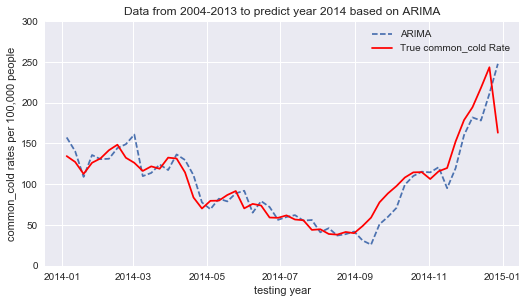

In [46]:
L=data.index[522:574]    
y2014 = pd.DataFrame(data=p_2014, index=L,columns=["predicted rate"])
y2014_1 = pd.DataFrame(data=t_2014, index=L,columns=["rates"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(y2014, label='ARIMA',ls='dashed')
line_down, = plt.plot(y2014_1, label='True common_cold Rate',c='r')
plt.legend(handles=[line_up, line_down])

plt.title('Data from 2004-2013 to predict year 2014 based on ARIMA' )
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()

### 2015

In [47]:
from sklearn.metrics import mean_squared_error
test_2015 = x[574:627]
model = sm.tsa.SARIMAX(test_2015, order=(7,2,0))

results_2015=model.fit()
predictions_2015=results_2015.predict()
test_2015=np.concatenate(test_2015, axis=0 )

In [49]:
predictions_2015[0]=158.9465
p_2015=predictions_2015[:]
t_2015=test_2015[:]
from sklearn.metrics import mean_squared_error
error=mean_squared_error(t_2015, p_2015)
RMSE=np.sqrt(error)
RMSE
print ('RMSE:%.4f'% RMSE)

RMSE:21.5159


In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2015, p_2015)
MAE=mean_absolute_error(t_2015, p_2015)
print ('MAE:%.4f'% MAE)

MAE:13.3054


In [51]:
def mean_absolute_percentage_error(y_valid, y_pred): 
    y_valid, y_pred = np.array(y_valid), np.array(y_pred)
    return np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100
MAPE=mean_absolute_percentage_error( t_2015,  p_2015)
print ('MAPE:%.4f'% MAPE)

MAPE:12.8605


In [52]:
np.corrcoef(t_2015, p_2015)

array([[ 1.        ,  0.89403001],
       [ 0.89403001,  1.        ]])

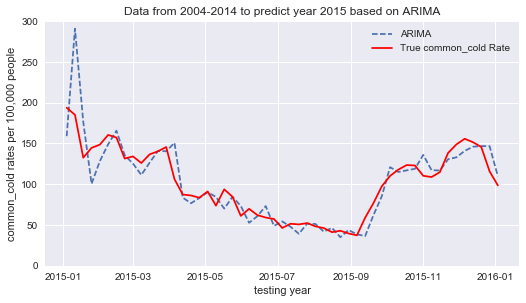

In [54]:
L=data.index[574:627]    
y2015 = pd.DataFrame(data=p_2015, index=L,columns=["predicted rate"])
y2015_1 = pd.DataFrame(data=t_2015, index=L,columns=["rates"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(y2015, label='ARIMA',ls='dashed')
line_down, = plt.plot(y2015_1, label='True common_cold Rate',color='red')
plt.legend(handles=[line_up, line_down])

plt.title('Data from 2004-2014 to predict year 2015 based on ARIMA' )
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()